<a href="https://colab.research.google.com/github/otmildaot/code/blob/main/Prediction_of_Cardiovascular_Disease_in_Cleveland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Loading the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/biostat/heart.csv')

In [ ]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
df('target',0)

TypeError: ignored

Features of the Data Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


Checking for null values in the dataset

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**The features described in the above data set are:**

**1. Count** tells us the number of NoN-empty rows in a feature.

**2. Mean** tells us the mean value of that feature.

**3. Std** tells us the Standard Deviation Value of that feature.

**4. Min** tells us the minimum value of that feature.

**5. 25%, 50%, and 75%** are the percentile/quartile of each features.

**6. Max** tells us the maximum value of that feature.

Checking features of Various attributes

1. Sex

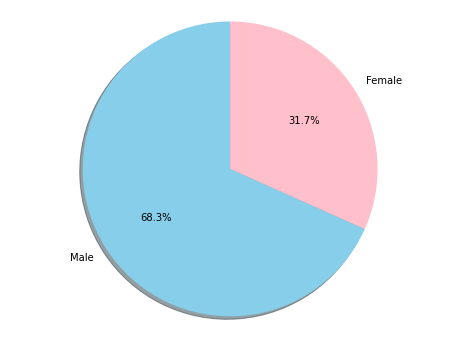

In [ ]:
male=len(df[df['sex']==1])
female=len(df[df['sex']==0])

plt.figure(figsize=(8,6))

#Data to plot

labels='Male','Female'
sizes=[male,female]
colors=['skyblue','pink']
explode=(0,0) #explode 1st slice

#Plot
plt.pie(sizes, explode=explode,labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

2. Chest Pain Type

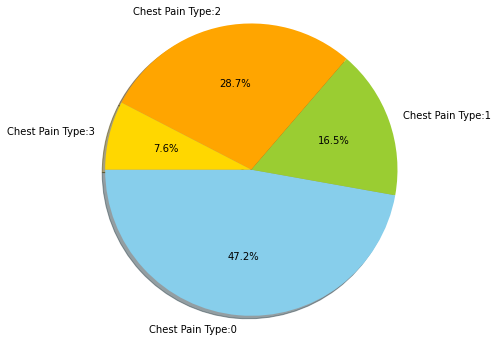

In [ ]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

3. fbs: (Fasting Blood Sugar > 120 mg/dl) (1=True, 0 = false)

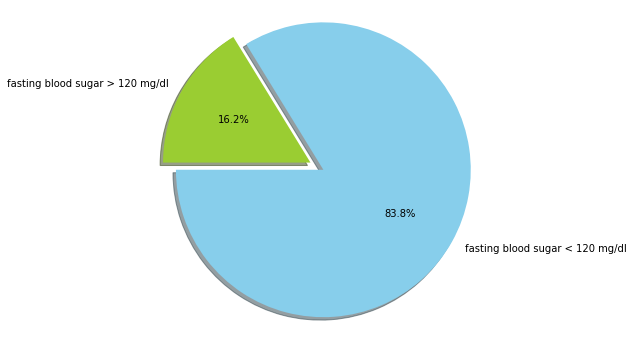

In [ ]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

Exploratory Data Analysis

In [ ]:
sns.set_style('whitegrid')

1. Heatmap

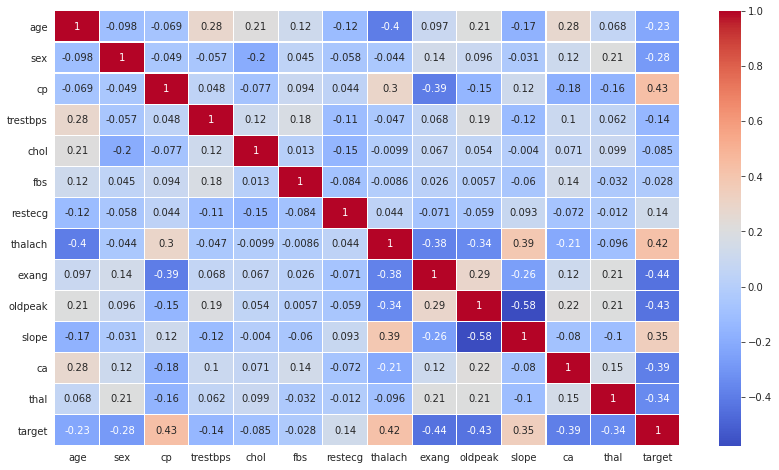

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

Plotting the distribution of various attributes

1. Maximum Heart Rate Achieved

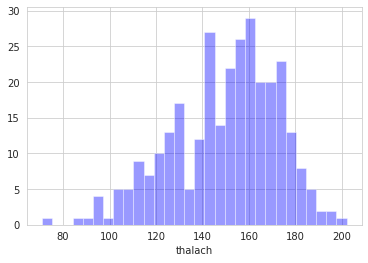

In [ ]:
sns.distplot(df['thalach'],kde=False,bins=30,color='blue')

2. Chol: Serum Cholesttoral in mg/dl

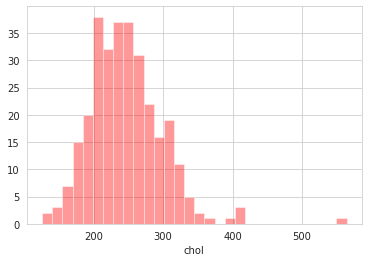

In [ ]:
sns.distplot(df['chol'],kde=False,bins=30,color='red')
plt.show()

3. trestbps: Resting Blood Pressure (in mm Hg on admission to the hospital)

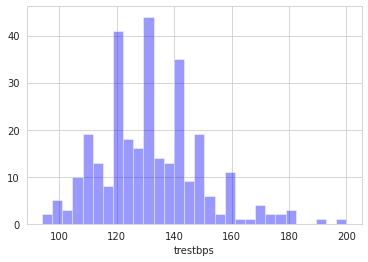

In [ ]:
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')
plt.show()

4. Number of People who have disease according to age

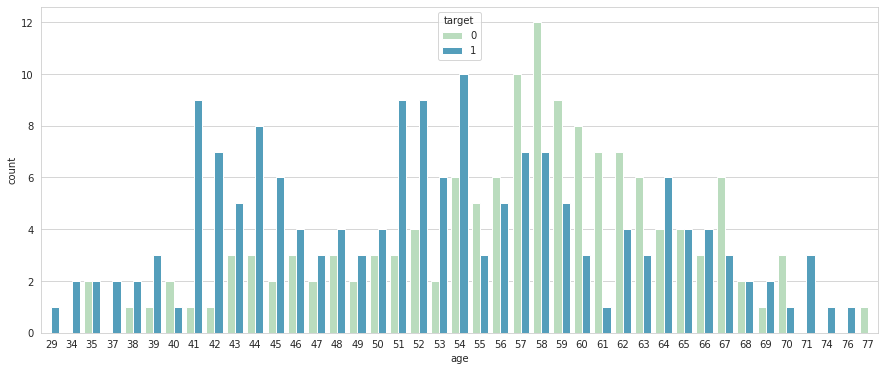

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

Making Prediction

Splitting the dataset into training and test set

In [ ]:
X= df.drop('target',axis=1)
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (212, 13) (212,)
Test (91, 13) (91,)


Preprocessing - Scaling the features

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
y_train

124    1
72     1
15     1
10     1
163    1
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 212, dtype: int64

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.673396,-1.394433,0.952809,-2.147870,-0.886805,-0.382029,0.870139,1.271190,-0.687184,-0.931190,0.955317,-0.676291,-0.548882
1,-2.763624,0.717137,-0.013677,-0.027779,-0.795025,-0.382029,-1.031608,2.284485,-0.687184,-0.931190,0.955317,-0.676291,-0.548882
2,-0.474146,-1.394433,0.952809,-0.616693,-0.519684,-0.382029,0.870139,0.346008,-0.687184,0.537925,-0.677967,-0.676291,-0.548882
3,-0.038055,0.717137,-0.980163,0.561135,-0.152563,-0.382029,0.870139,0.434121,-0.687184,0.170646,0.955317,-0.676291,-0.548882
4,-1.782419,0.717137,0.952809,0.443352,-1.327350,-0.382029,0.870139,1.006853,-0.687184,-0.931190,0.955317,3.540580,-0.548882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,-0.474146,0.717137,0.952809,0.561135,-0.262699,-0.382029,0.870139,0.566290,-0.687184,-0.380272,-0.677967,0.377927,1.137539
208,-0.365123,0.717137,0.952809,-2.147870,-0.372836,-0.382029,0.870139,0.169783,1.455214,-0.931190,0.955317,0.377927,1.137539
209,1.597286,0.717137,1.919296,1.738963,-0.244343,2.617604,-1.031608,-0.843512,-0.687184,-0.839370,-0.677967,0.377927,-0.548882
210,-0.910237,0.717137,-0.980163,-0.616693,0.030997,-0.382029,-1.031608,-0.270780,-0.687184,-0.196633,0.955317,-0.676291,1.137539


1. Decision Tree

Implementing GridSearchCV to select the best parameters and applying k-NN Alghoritm

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)


In [ ]:
#Setting parameters for GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [ ]:
tree_model.fit(X_train,y_train)
#Printing best parameters selected through GridSearchCV
tree_model.best_params_

{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 11}

Making Prediction

In [ ]:
predict_t = tree_model.predict(X_test)

Accuracy Metrics

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict_t))
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,predict_t),5)*100,'%')

Accuracy Score:  0.7252747252747253
Using Decision Tree we get an accuracy score of:  72.527 %


In [ ]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

Classification Report

In [ ]:
print(classification_report(y_test,predict_t))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,predict_t)
cnf_matrix

array([[31, 10],
       [15, 35]])

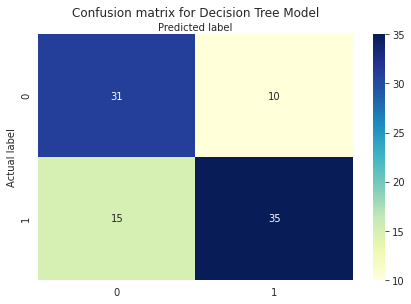

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Receiver Operating Characteristic(ROC) Curve

In [ ]:
#Get predicted probabilites
target_probailities_tree = tree_model.predict_proba(X_test)[:,1]

In [ ]:
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)

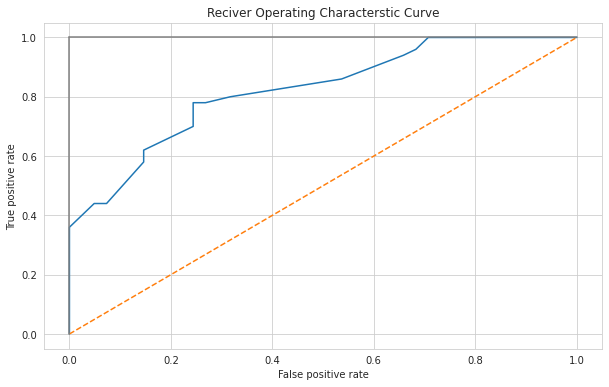

In [ ]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_tree)

0.8212195121951219

2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [ ]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

In [ ]:
log_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print()

In [ ]:
predict_l = log_model.predict(X_test)

Accuracy Metrics

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict_l))
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,predict_l),5)*100,'%')

Accuracy Score:  0.8241758241758241
Using Logistic Regression we get an accuracy score of:  82.418 %


In [ ]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

print(classification_report(y_test,predict_l))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Confussion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cnf_matrix = confusion_matrix(y_test,predict_l)
cnf_matrix

array([[33,  8],
       [ 8, 42]])

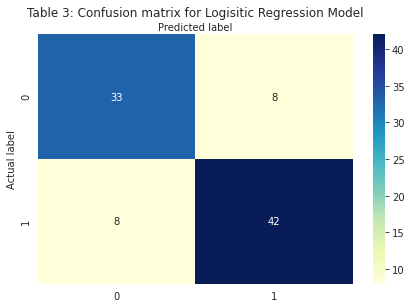

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Table 3: Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



Receiver Operating Characteristic (ROC) Curve

In [ ]:
#Get predicted probabilites
target_probailities_log = log_model.predict_proba(X_test)[:,1]

In [ ]:
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)

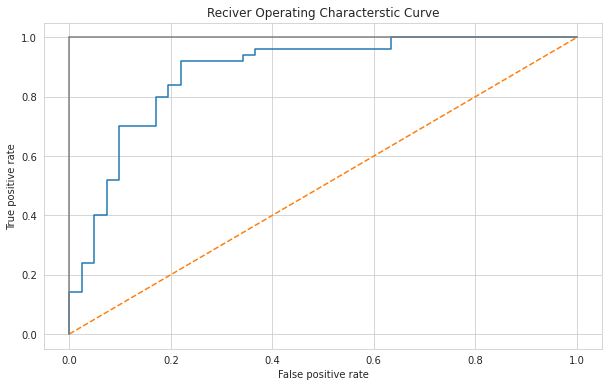

In [ ]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()


In [ ]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_log)

0.8814634146341463

3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)



In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predict_r = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict_r))
print('Using RandomForest we get an accuracy score of: ',
      round(accuracy_score(y_test,predict_r),5)*100,'%')

Accuracy Score:  0.8131868131868132
Using RandomForest we get an accuracy score of:  81.319 %


In [ ]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

print(classification_report(y_test,predict_r))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cnf_matrix = confusion_matrix(y_test,predict_r)
cnf_matrix

array([[32,  9],
       [ 8, 42]])

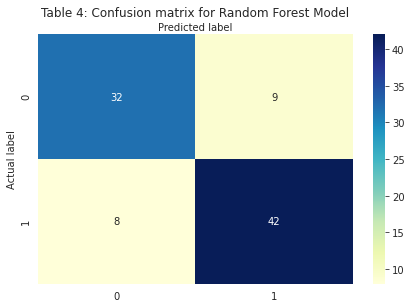

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Table 4: Confusion matrix for Random Forest Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Get predicted probabilites
target_probailities_ran = clf.predict_proba(X_test)[:,1]

In [ ]:
#Create true and false positive rates
ran_false_positive_rate,ran_true_positive_rate,ran_threshold = roc_curve(y_test,
                                                             target_probailities_ran)

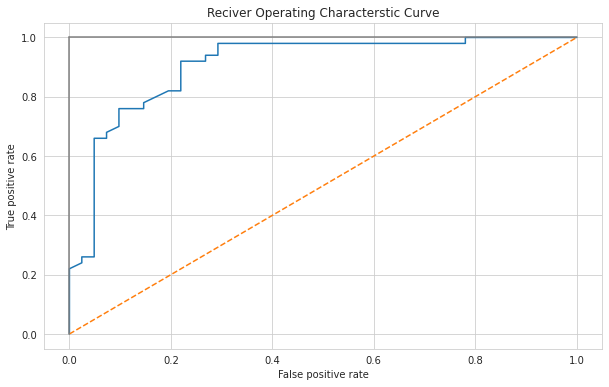

In [ ]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(ran_false_positive_rate,ran_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()


In [ ]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_ran)

0.9063414634146342

Comparing ROC Curve of Logistic Regression and Decision Tree Random Forest

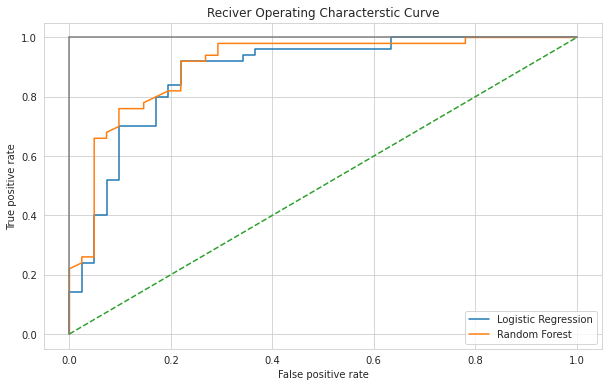

In [ ]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(ran_false_positive_rate,ran_true_positive_rate,label='Random Forest')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()